# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Guilherme Fernandes Rezende Santos

**RA**: 813467


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

##### Importando as bibliotecas que serão usadas nessa etapa

In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Prepara o DF dos dados do treinamento

In [562]:
dados_treino = pd.read_csv('./data/train.csv')
dados = pd.read_csv('./data/RHP_data.csv')
dados_teste = pd.read_csv('./data/test.csv')

dados_treino = dados.merge(dados_treino, on='Id', how='right')
dados_teste = dados.merge(dados_teste, on='Id', how='right')

dados_treino = dados_teste

display(dados_treino)


,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,8957,4.5,54,15.0,03/08/09,11/06/09,0.15,NaN,Normais,NaN,NaN,Não Calculado,Normal,ausente,110,Dispneia,Outro,F,2 - Check-up,NaN
1,4246,42.4,150,19.0,23/02/06,03/03/94,12.43,MEDISE,Normais,NaN,NaN,Não Calculado,Normal,ausente,84,Assintomático,NaN,M,5 - Parecer cardiológico,5 - Atividade física
2,9089,18.1,104,17.0,16/10/07,08/02/04,3.82,CAMED,Normais,130.0,90.0,HAS-2 PAS,Normal,ausente,100,Cianose,NaN,M,5 - Parecer cardiológico,NaN
3,10606,7.7,0,NaN,09/08/04,27/11/03,0.73,SULA,Normais,NaN,NaN,Não Calculado,Normal,ausente,98,Assintomático,NaN,F,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica
4,9863,16.0,0,NaN,04/07/08,29/08/04,3.99,NORCLIN.,Normais,NaN,NaN,Não Calculado,Normal,ausente,90,Assintomático,NaN,F,5 - Parecer cardiológico,5 - Cirurgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,14053,0.0,0,NaN,16/09/09,19/04/02,7.69,FUSEX,Normais,100.0,70.0,Não Calculado,Normal,ausente,72,NaN,NaN,M,2 - Check-up,NaN
3142,9000,0.0,0,NaN,12/01/05,06/11/95,9.529999999999999,GS,Normais,90.0,50.0,Não Calculado,Normal,Sistólico,82,Dor precordial,NaN,F,6 - Suspeita de cardiopatia,6 - Dor precordial
3143,14643,46.0,151,20.0,18/02/04,20/10/90,13.83,UR,Normais,120.0,60.0,Normal,Normal,Sistólico,96,Dispneia,NaN,F,6 - Suspeita de cardiopatia,6 - Dor precordial
3144,15107,NaN,50,NaN,05/09/06,04/09/06,0,GS,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,133,NaN,NaN,Indeterminado,6 - Suspeita de cardiopatia,6 - Sopro


##### Após o carregamento dos dados, será estudado a análise de cada atributo

* Peso: representa o peso, em Kg, de cada indivíduo.

* Altura: representa a altura, em cm, de cada indivíduo.

* IMC: representa o índice de massa corporal do paciente, índice que representa se o paciente estáem seu peso ideal ou não. É calculado pelo peso (em metros) dividido pela altura elevada ao quadrado.

* Atendimento: indica a data em que foi feito o atendimento do paciente.

* DN: data em que a declaração de nascido vivo do paciente foi escrita.

* Idade: representa a idade do paciente, sendo os anos representados por um valor real.

* Convênio: Indica qual o convênio do cliente.

* Pulsos: Indica a qualidade da circulação arterial. Pulsos fracos ou ausentes podem sugerir problemas como obstrução arterial ou insuficiência cardíaca.

* PA Sistolica: valor mais alto (medido em mmHg) que aparece durante uma aferição de pressão. Representa a pressão exercida nas artérias durante a contração do coração (sístole). Valores elevados indicam hipertensão arterial, enquanto valores muito baixos podem sugerir hipotensão.

* PA Diastolica: valor mais baixo (medido em mmHg) que aparece durante uma aferição de pressão. Reflete a pressão arterial durante o relaxamento do coração (diástole). É usada junto com a PA sistólica para diagnosticar hipertensão.

* PPA (Pressão de Pulso Arterial): Diferença entre a pressão arterial sistólica e diastólica. Indica a rigidez arterial. Valores elevados podem estar associados a doenças cardiovasculares.

* B2: Segundo Ruído Cardíaco, representa o som do fechamento das válvulas aórtica e pulmonar. Alterações no B2 podem sugerir problemas como hipertensão pulmonar ou doenças valvares.

* Sopro: Presença de ruídos anormais detectados durante a ausculta cardíaca. Pode indicar problemas como regurgitação ou estenose valvar.

* FC (Frequência Cardíaca): número de batimentos cardíacos por minuto (bpm). Frequências muito altas (taquicardia) ou baixas (bradicardia) podem indicar problemas cardíacos ou metabólicos.

* HDA1 (Histórico de doenças atual 1): informações detalhadas sobre o principal problema clínico atual.

* HDA2 (Histórico de doenças atual 2): informações adicionais sobre o problema clínico ou outras condições associadas.

* Sexo: genêro biológico do paciente.

* Motivo 1: principal razão para a consulta.

* Motivo 2: razão secundária para a consulta.

##### Medidas descritivas dos dados

In [563]:
display(dados_treino.describe(include='all'))

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
count,3146.000000,3088.000000,3146.000000,2436.000000,3146,3146,3146,2335,3140,1911.000000,1911.000000,3126,3144,3144,3000,2346,113,3145,3122,2427
unique,NaN,NaN,NaN,NaN,1474,2441,1312,177,5,NaN,NaN,8,5,6,75,8,7,6,5,15
top,NaN,NaN,NaN,NaN,09/07/07,16/06/03,0,GS,Normais,NaN,NaN,Não Calculado,Normal,ausente,80,Assintomático,Dispneia,M,5 - Parecer cardiológico,5 - Cirurgia
freq,NaN,NaN,NaN,NaN,9,6,50,542,3114,NaN,NaN,1711,3018,2004,465,1777,33,1677,1489,783
mean,8893.254291,22.026231,88.050223,17.867406,NaN,NaN,NaN,NaN,NaN,100.962323,62.006279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5122.239610,17.422042,54.264037,15.284035,NaN,NaN,NaN,NaN,NaN,17.553885,8.592640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,70.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4507.750000,9.000000,51.000000,15.000000,NaN,NaN,NaN,NaN,NaN,90.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9002.500000,18.500000,102.000000,17.000000,NaN,NaN,NaN,NaN,NaN,100.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13236.750000,32.000000,130.000000,19.000000,NaN,NaN,NaN,NaN,NaN,105.000000,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Correção de 'Normais' por 'Normal'
Antes de plotar os gŕaficos, farei uma pequena substituição em uma amostra específica, apenas para corrigir a classe de normais para normal, afim de tornar o gráfico menos variado

##### Plotando os Gráficos

Gráfico de distribuição em relação ao motivo1 da visita e a condição do paciente

##### Insights obtidos após obeservação e análise dos gráficos

* No motivo 1 para a visita, uma parte considerável dos pacientes que possuem parecer cardiológico e suspeita de cardiopatia possuem alguma anormalidade.

* No motivo 2 para a visita, uma parte considerável dos pacientes que tem como motivo cirurgia, sopro e cardiopatia congenica possuem alguma anormalidade. Com atenção especial voltada para o sopro, pois cerca de <strong>72%</strong>  daqueles que possuem sopro como condição possuem alguma anormalidade.

* No histórico de doença atual 2, todos os diferentes valores possuem uma parcela considerável de pacientes com anormalidade, assim não pode-se desconsiderar nenhum deles.

* Em SOPRO,é necessário padronizar os valores, visto que há diferentes valores que representam a mesma coisa, como Sistólico e sistólico, o mesmo ocorre com o atributo pulso.

* Há a existência de outliners a serem tratados, como mostrado pelo gráfico boxplot.

* Além dos outliers, é necessário tratar diversos casos de ruído, como #VALUE em PPA

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

#### Começaremos o pré-processamento dos dados com a remoção de outliers nas colunas numéricas

##### Agora iremos remover as inconsistências entra os valores de cada coluna.



Começaremos pelo peso, pelo gráfico boxplot há apenas um outlier a ser removido, um peso negativo e diversos pesos com valor igual a 0. Os demais pesos acima do Q3 não serão removidos pois não apresentam inconsistências e também apresentam um grande volume de dados.

In [564]:
peso_outliner = dados_treino[dados_treino['Peso'] < 0]
peso_invalido = dados_treino[dados_treino["Peso"] == 0]

dados_treino.drop(peso_outliner.index, inplace=True)
dados_treino.drop(peso_invalido.index, inplace=True)

In [565]:
peso_outliner = dados_teste[dados_teste["Peso"] < 0]
peso_invalido = dados_teste[dados_teste["Peso"] == 0]

dados_teste.drop(peso_outliner.index, inplace=True)
dados_teste.drop(peso_invalido.index, inplace=True)

Plotagem do boxplot da coluna 'Peso' para mostrar a remoção do outliner

Agora trataremos amostras de com alturas inválidas, que possuem valor igual a 0. Outros valores também são considerados inválidos, pois são pequenos demais para serem verdade, seguindo a tabela da fonte: https://www.unimed.coop.br/viver-bem/pais-e-filhos/estatura-por-idade

In [566]:
pd.set_option("display.max_columns", None)

É convertido a coluna idade em float para poder realizar as comparações.

In [567]:
# Converte a coluna 'IDADE' para numérica
dados_treino["IDADE"] = pd.to_numeric(dados_treino["IDADE"], errors="coerce")


altura_invalida = dados_treino[dados_treino["Altura"] == 0]
dados_treino.drop(altura_invalida.index, inplace=True)

altura_irreal = dados_treino[dados_treino["Altura"] < 45]
dados_treino.drop(altura_irreal.index, inplace=True)

altura_fora_padrao = dados_treino[
    (dados_treino["Altura"] < 80) & (dados_treino["IDADE"] >= 2)
]
dados_treino.drop(altura_fora_padrao.index, inplace=True)

In [568]:
# Converte a coluna 'IDADE' para numérica
dados_teste["IDADE"] = pd.to_numeric(dados_teste["IDADE"], errors="coerce")



altura_irreal = dados_teste[dados_teste["Altura"] < 45]
dados_teste.drop(altura_irreal.index, inplace=True)

altura_fora_padrao = dados_teste[
    (dados_teste["Altura"] < 80) & (dados_teste["IDADE"] >= 2)
]
dados_teste.drop(altura_fora_padrao.index, inplace=True)

Após remover os valores inválidos de altura, iremos substituir os valores NaN de altura  por sua mediana, devido ao alto desvio padrão da amostra. 

In [569]:
display(dados_treino['Altura'].describe(include='all'))

count    2443.000000
mean      112.056488
std        32.998177
min        45.000000
25%        91.000000
50%       114.000000
75%       138.000000
max       197.000000
Name: Altura, dtype: float64

In [570]:
dados_treino['Altura'] = dados_treino['Altura'].fillna(value=dados_treino['Altura'].median())

Agora iremos repetir o processo para o peso

In [571]:
dados_treino["Peso"] = dados_treino["Peso"].fillna(
    value=dados_treino["Peso"].median()
)

Tratados todos os valores faltantes para altura e peso, agora iremos recalcular o imc

In [572]:
altura = dados_treino['Altura']
peso = dados_treino['Peso']

altura /= 100

imc = peso / (altura ** 2)

dados_treino['IMC'] = imc

Plotando o boxplot do IMC para mostrar a remoção de valores inválidos.

Após padronizar o peso de a altura, iremos usá-los para resolver as inconsistências nos valores da coluna idade. Para iniciar, iremos converte-lá para o tipo float.

Agora iremos plotar o boxplot para analisar os dados.

Como se pode observar, há um número gigantesco de inconsistências, por isso não seria possível apenas removê-los, ainda mais considerando o tamanho do conjunto de dados. Para isso, iremos usar o peso e a altura de cada um para substituir esses valores incorretos, que deveriam estar num intervalo de 0 até 19 anos.

Em seguida, iremos padronizar os valores de 'SEXO' em valores únicos, como também  resolver os NaN e indeterminados.

Primeiro, iremos padronizar os diferentes valores.

In [573]:
x = dados_treino['SEXO'] == 'masculino'
dados_treino.loc[x, 'SEXO'] = 'M'

x = dados_treino["SEXO"] == "Masculino"
dados_treino.loc[x, "SEXO"] = "M"

x = dados_treino["SEXO"] == "Feminino"
dados_treino.loc[x, "SEXO"] = "F"

Após padronizar os valores, iremos analisar os dados para verificar como iremos tratar os valores faltantes.

In [574]:
print(len(dados_treino[dados_treino['SEXO'] == 'M']))
print(len(dados_treino[dados_treino['SEXO'] == 'F']))

1405
981


A quantidade de Homens para mulheres segue a distribuição de 3/5 para 2/5 nas amostras com valores, então essa distribuição será usada para as amostras faltantes

In [575]:
valores_faltantes  = dados_treino['SEXO'].isna().sum()
valores_faltantes += len(dados_treino[dados_treino['SEXO'] == 'Indeterminado'])

qtd_homens = int(valores_faltantes * 3/5)
qtd_mulheres = valores_faltantes - qtd_homens

Calculados os valores, iremos começar o processo de substituição

In [576]:
# Substituimdo 'Indeterminado' por NaN para facilitar
dados_treino["SEXO"] = dados_treino["SEXO"].replace("Indeterminado", np.nan)

dados_treino.loc[dados_treino["SEXO"].isna(), "SEXO"] = ["M"] * qtd_homens + ["F"] * qtd_mulheres

Plotando o gráfico de sexo por classes para mostrara  mudança.

A próxima coluna que terá os outliners tratados será a 'PA SISTOLICA'. Após uma breve pesquisa, foi encintrado que valores abaixo de 20 mmHg e acima de 250 mmHg são considerados valores absurdo, tratados como erro de medição, assim eles serão usados como intervalos para detectar outliners

In [577]:
outliners_pasistolica_acima = (dados_treino[dados_treino["PA SISTOLICA"] > 250]) 
outliners_pasistolica_abaixo = dados_treino[dados_treino["PA SISTOLICA"] < 20]

dados_treino.drop(outliners_pasistolica_abaixo.index, inplace=True)
dados_treino.drop(outliners_pasistolica_acima.index, inplace=True)

Agora iremos lidar com os valores faltantes em PA SISTOLICA e PA DIASTOLICA. Mas primeiro iremos analisar o desvio padrão de cada uma.

In [578]:
print(dados_treino['PA SISTOLICA'].describe())

count    1536.000000
mean      100.519531
std        10.980510
min        70.000000
25%        90.000000
50%       100.000000
75%       105.000000
max       160.000000
Name: PA SISTOLICA, dtype: float64


In [579]:
print(dados_treino["PA DIASTOLICA"].describe())

count    1536.000000
mean       61.965495
std         8.550489
min        35.000000
25%        60.000000
50%        60.000000
75%        65.750000
max       100.000000
Name: PA DIASTOLICA, dtype: float64


Levando em conta que o std é relativamente baixo, podemos substituir os valores NaN pelas médias.

In [580]:
dados_treino['PA DIASTOLICA'] = dados_treino['PA DIASTOLICA'].fillna(value=dados_treino['PA DIASTOLICA'].mean())

dados_treino['PA SISTOLICA'] = dados_treino["PA SISTOLICA"].fillna(
    value=dados_treino["PA SISTOLICA"].mean()
)

In [581]:
print(dados_treino['PA DIASTOLICA'].isna().sum())

0


In [582]:
print(dados_treino["PA SISTOLICA"].isna().sum())

0


Plotagem do boxplot da coluna 'PA SISTOLICA' para mostrar a remoção dos outliners

A próxima coluna que terá seus outliners tratados será a 'PA DIASTOLICA'. Após procurar, são ditos como valores irreais: valores inferiores a 30mmHg e valores acima de 150mHg.

In [583]:
outliners_diastolica_abaixo = dados_treino[dados_treino['PA DIASTOLICA'] < 30]
outliners_diastolica_acima = dados_treino[dados_treino['PA DIASTOLICA'] > 150]

dados_treino.drop(outliners_diastolica_abaixo.index, inplace=True)
dados_treino.drop(outliners_diastolica_acima.index, inplace=True)

Plotagem dos boxplot para comprovar a remoção de outliners

A respeito da coluna IMC, ao invés de removermos os outliners, que estão em grande quantidade, iremos usar os valores de peso e altura para recalcular o IMC.

Começando pelas incosistências na coluna 'SOPRO', padronizando diferentes valores que representam a mesma coisa.

In [584]:
x = dados_treino['SOPRO'] == 'contínuo'
dados_treino.loc[x, 'SOPRO'] = 'Contínuo'

x = dados_treino["SOPRO"] == "sistólico"
dados_treino.loc[x, 'SOPRO'] = 'Sistólico'

Plotagem da coluna 'SOPRO' para verificar as alterações

A próxima incosistência está localizada na coluna PPA (pressão de pulso arterial). Muitos amostras possuem #VALUE! e 'Não calculado' como valor, serão recalculados utilizando a pressão arterial sistólica e pressão arterial diastólica.

In [585]:
error_values = (
    (dados_treino["PPA"] == "#VALUE!")
    | (dados_treino["PPA"] == "Não Calculado")
    | (dados_treino["PPA"].isna())
)

pas_value = dados_treino.loc[error_values, 'PA DIASTOLICA']
pad_value = dados_treino.loc[error_values, "PA SISTOLICA"]

ids = dados_treino.loc[error_values, 'Id']

ids_list = []

for i in ids:
  ids_list.append(i)

Com os valores da recuperados, agora iremos criar uma função para clássificá-los de acordo com seus valores e depois inseri-los no DF

In [586]:
def classificar_ppa_completo(pas_value, pad_value):
    if pas_value < 120 and pad_value < 80:
        return "Normal"
    elif 120 <= pas_value < 140:
        return "Pre-Hipertensão PAS"
    elif 80 <= pad_value < 90:
        return "Pre-Hipertensão PAD"
    
    elif 140 <= pas_value < 160 or 90 <= pad_value < 100:
        if pas_value >= 140 and pas_value < 160:
            return "HAS-1 PAS"
        elif pad_value >= 90 and pad_value < 100:
            return "HAS-1 PAD"

    elif pas_value >= 160 or pad_value >= 100:
        if pas_value >= 160:
            return "HAS-2 PAS"
        elif pad_value >= 100:
            return "HAS-2 PAD"


    return "Não Calculado"


categorias = []

for i in range (len(pas_value)):
    categorias.append(classificar_ppa_completo(pas_value.iloc[i], pad_value.iloc[i]))

Após calcular as novas classificações, iremos inserir os novos valores no DF original

In [587]:
dados_treino.loc[error_values, 'PPA'] = categorias

Plotando o gráfico da coluna PPA para verificar as novas mudanças

Indo para a próxima coluna iremos tratar os valores de 'PULSOS'

Primeiro, iremos plotar o gráfico para ter uma noção da distribuição

Levando em conta que a grande maioria dos pulsos são normais, de maneira que não há comparação com as demais, iremos substituir os NaN por normais.

In [588]:
dados_treino['PULSOS'] = dados_treino['PULSOS'].fillna('Normais')

Printando os tipos diferente de pulso para confirmar a alteração

In [589]:
print(dados_treino['PULSOS'].unique())

['Normais' 'Outro' 'Femorais diminuidos' 'Amplos']


O mesmo processo se repetirá para 'B2'

Novamente, sua grande maioria é normal, então será substituido por normal

In [590]:
dados_treino["B2"] = dados_treino["B2"].fillna("Normal")

In [591]:
print(dados_treino["PULSOS"].unique())

['Normais' 'Outro' 'Femorais diminuidos' 'Amplos']


Agora iremos tratar a coluna 'SOPRO'

Como há dois valores dominantes (ausente e sistólico), iremos calcular a proporção de cada um e substituir os valores NaN seguindo essa proporção

In [592]:
qtd_ausente = len(dados_treino[dados_treino['SOPRO'] == 'ausente'])
qtd_sistolico = len(dados_treino) - qtd_ausente

prop_ausente = qtd_ausente / (qtd_ausente + qtd_sistolico)


Calculadas as proporções, agora iremos atribuir aos valores NaN as seguindo.

In [593]:
valores_faltantes = dados_treino['SOPRO'].isna().sum()

qtd_ausente = int(valores_faltantes * prop_ausente)
qtd_sistolico = valores_faltantes - qtd_ausente


In [594]:
dados_treino.loc[dados_treino['SOPRO'].isna(), 'SOPRO'] = 'ausente' * qtd_ausente + 'Sistólico' * qtd_sistolico

Conferindo se os valores ausentes foram removidos

In [595]:
print(dados_treino['SOPRO'].isna().sum())

0


Agora trataremos a coluna FC, mas primeiro, é preciso converte-los primeiro

In [596]:
dados_treino["FC"] = pd.to_numeric(dados_treino["FC"], errors="coerce")

Depois de se converter, os valores são análisados

Pós plotagem do boxplot, fica evidente a necessidade de lidar com outliners

In [597]:
fc_acima =dados_treino[dados_treino['FC'] > 250]
fc_abaixo =dados_treino[dados_treino['FC'] < 20]

print(len(fc_abaixo), len(fc_acima))

2 1


Plotando o boxplot novamente para verificar se os outliners foram removidos

Agora iremos tratar os valores faltantes

In [598]:
print(dados_treino['FC'].describe())

count    2343.000000
mean       92.293641
std        23.517550
min         8.000000
25%        80.000000
50%        90.000000
75%       100.000000
max       900.000000
Name: FC, dtype: float64


Como o std é relativamente baixo para as amostras, os NaN serão substítuidos pela média

In [599]:
dados_treino['FC'] = dados_treino['FC'].fillna(value=dados_treino['FC'].mean())

Conferindo se os NaN foram removidos

In [600]:
print(dados_treino['FC'].isna().sum())

0


In [601]:
dados_treino['FC'] = dados_treino['FC'].drop(fc_acima.index)
dados_treino['FC'] = dados_treino['FC'].drop(fc_abaixo.index)

Partindo para o HDA 1, analisaremos possíveis inconsistencias e valores NaN

In [602]:
print(dados_treino['HDA 1'].isna().sum())

553


Como há muitos valores NaN, remover todas essas amostras será muito prejudicial, por isso iremos plotar e analisar os gráficos para decidir o que fazer.

Faremos uma distribuição baseada em proproção, assim como foram as anteriores.

In [603]:
qtd_assintomatico = len(dados_treino[dados_treino['HDA 1'] == 'Assintomático'])
qtd_dor_precordial = len(dados_treino[dados_treino['HDA 1'] == 'Dor precordial'])
qtd_dispneia = len(dados_treino[dados_treino['HDA 1'] == 'Dispneia'])
qtd_palpitacao = len(dados_treino[dados_treino['HDA 1'] == 'Palpitacao'])
qtd_desmaio = len(dados_treino[dados_treino['HDA 1'] == 'Desmaio/tontura'])
qtd_cianose = len(dados_treino[dados_treino['HDA 1'] == 'Cianose'])
qtd_outro = len(dados_treino[dados_treino['HDA 1'] == 'Outro'])
qtd_peso = len(dados_treino[dados_treino['HDA 1'] == 'Ganho de peso'])

In [604]:
valores_faltantes = dados_treino["HDA 1"].isna().sum()
total_presentes = (
    qtd_assintomatico
    + qtd_dor_precordial
    + qtd_dispneia
    + qtd_palpitacao
    + qtd_desmaio
    + qtd_cianose
    + qtd_outro
    + qtd_peso
)

prop_assintomatico = qtd_assintomatico / total_presentes
prop_dor_precordial = qtd_dor_precordial / total_presentes
prop_dispneia = qtd_dispneia / total_presentes
prop_palpitacao = qtd_palpitacao / total_presentes
prop_desmaio = qtd_desmaio / total_presentes
prop_cianose = qtd_cianose / total_presentes
prop_outro = qtd_outro / total_presentes
prop_peso = qtd_peso / total_presentes

In [531]:
qtd_assintomatico_faltantes = int(valores_faltantes * prop_assintomatico)
qtd_dor_precordial_faltantes = int(valores_faltantes * prop_dor_precordial)
qtd_dispneia_faltantes = int(valores_faltantes * prop_dispneia)
qtd_palpitacao_faltantes = int(valores_faltantes * prop_palpitacao)
qtd_desmaio_faltantes = int(valores_faltantes * prop_desmaio)
qtd_cianose_faltantes = int(valores_faltantes * prop_cianose)
qtd_outro_faltantes = int(valores_faltantes * prop_outro)
qtd_peso_faltantes = valores_faltantes - (
    qtd_assintomatico_faltantes
    + qtd_dor_precordial_faltantes
    + qtd_dispneia_faltantes
    + qtd_palpitacao_faltantes
    + qtd_desmaio_faltantes
    + qtd_cianose_faltantes
    + qtd_outro_faltantes
)


valores_faltantes_lista = (
    ["Assintomático"] * qtd_assintomatico_faltantes
    + ["Dor precordial"] * qtd_dor_precordial_faltantes
    + ["Dispneia"] * qtd_dispneia_faltantes
    + ["Palpitacao"] * qtd_palpitacao_faltantes
    + ["Desmaio/tontura"] * qtd_desmaio_faltantes
    + ["Cianose"] * qtd_cianose_faltantes
    + ["Outro"] * qtd_outro_faltantes
    + ["Ganho de peso"] * qtd_peso_faltantes
)


import random

# Embaralhando os valores para evitar viés de posição
random.shuffle(valores_faltantes_lista)


dados_treino.loc[dados_treino["HDA 1"].isna(), "HDA 1"] = valores_faltantes_lista


Partindo para HDA2, seguindo o mesmo procedimento, analisando os dados e depois tomando uma ação

Será feito a mesma abordagem que HDA1

In [532]:
qtd_assintomatico = len(dados_treino[dados_treino["HDA2"] == "Assintomático"])
qtd_dor_precordial = len(dados_treino[dados_treino["HDA2"] == "Dor precordial"])
qtd_dispneia = len(dados_treino[dados_treino["HDA2"] == "Dispneia"])
qtd_palpitacao = len(dados_treino[dados_treino["HDA2"] == "Palpitacao"])
qtd_desmaio = len(dados_treino[dados_treino["HDA2"] == "Desmaio/tontura"])
qtd_cianose = len(dados_treino[dados_treino["HDA2"] == "Cianose"])
qtd_outro = len(dados_treino[dados_treino["HDA2"] == "Outro"])
qtd_peso = len(dados_treino[dados_treino["HDA2"] == "Ganho de peso"])

In [533]:
valores_faltantes = dados_treino["HDA2"].isna().sum()
total_presentes = (
    qtd_assintomatico
    + qtd_dor_precordial
    + qtd_dispneia
    + qtd_palpitacao
    + qtd_desmaio
    + qtd_cianose
    + qtd_outro
    + qtd_peso
)

prop_assintomatico = qtd_assintomatico / total_presentes
prop_dor_precordial = qtd_dor_precordial / total_presentes
prop_dispneia = qtd_dispneia / total_presentes
prop_palpitacao = qtd_palpitacao / total_presentes
prop_desmaio = qtd_desmaio / total_presentes
prop_cianose = qtd_cianose / total_presentes
prop_outro = qtd_outro / total_presentes
prop_peso = qtd_peso / total_presentes

In [534]:
qtd_assintomatico_faltantes = int(valores_faltantes * prop_assintomatico)
qtd_dor_precordial_faltantes = int(valores_faltantes * prop_dor_precordial)
qtd_dispneia_faltantes = int(valores_faltantes * prop_dispneia)
qtd_palpitacao_faltantes = int(valores_faltantes * prop_palpitacao)
qtd_desmaio_faltantes = int(valores_faltantes * prop_desmaio)
qtd_cianose_faltantes = int(valores_faltantes * prop_cianose)
qtd_outro_faltantes = int(valores_faltantes * prop_outro)
qtd_peso_faltantes = valores_faltantes - (
    qtd_assintomatico_faltantes
    + qtd_dor_precordial_faltantes
    + qtd_dispneia_faltantes
    + qtd_palpitacao_faltantes
    + qtd_desmaio_faltantes
    + qtd_cianose_faltantes
    + qtd_outro_faltantes
)


valores_faltantes_lista = (
    ["Assintomático"] * qtd_assintomatico_faltantes
    + ["Dor precordial"] * qtd_dor_precordial_faltantes
    + ["Dispneia"] * qtd_dispneia_faltantes
    + ["Palpitacao"] * qtd_palpitacao_faltantes
    + ["Desmaio/tontura"] * qtd_desmaio_faltantes
    + ["Cianose"] * qtd_cianose_faltantes
    + ["Outro"] * qtd_outro_faltantes
    + ["Ganho de peso"] * qtd_peso_faltantes
)


import random

# Embaralhando os valores para evitar viés de posição
random.shuffle(valores_faltantes_lista)


dados_treino.loc[dados_treino["HDA2"].isna(), "HDA2"] = valores_faltantes_lista

In [609]:
print(dados_treino['HDA2'].isna().sum())

0


Agora iremos tratar os motivos

In [610]:
print(dados_treino['MOTIVO1'].isna().sum())

22


PLotando o gráfico

O mesmo processo de porporção será repetido

In [537]:
qtd_suspeita = len(
    dados_treino[dados_treino["MOTIVO1"] == "6 - Suspeita de cardiopatia"]
)
qtd_parecer = len(dados_treino[dados_treino["MOTIVO1"] == "5 - Parecer cardiológico"])
qtd_outro = len(dados_treino[dados_treino["MOTIVO1"] == "7 - Outro"])
qtd_checkup = len(dados_treino[dados_treino["MOTIVO1"] == "2 - Check-up"])
qtd_cardiopatia = len(
    dados_treino[dados_treino["MOTIVO1"] == "1 - Cardiopatia já estabelecida"]
)

In [538]:
valores_faltantes = dados_treino["MOTIVO1"].isna().sum()
total_presentes = qtd_suspeita + qtd_parecer + qtd_outro + qtd_checkup + qtd_cardiopatia

prop_suspeita = qtd_suspeita / total_presentes
prop_parecer = qtd_parecer / total_presentes
prop_outro = qtd_outro / total_presentes
prop_checkup = qtd_checkup / total_presentes
prop_cardiopatia = qtd_cardiopatia / total_presentes

In [539]:
qtd_suspeita_faltantes = int(valores_faltantes * prop_suspeita)
qtd_parecer_faltantes = int(valores_faltantes * prop_parecer)
qtd_outro_faltantes = int(valores_faltantes * prop_outro)
qtd_checkup_faltantes = int(valores_faltantes * prop_checkup)
qtd_cardiopatia_faltantes = valores_faltantes - (
    qtd_suspeita_faltantes
    + qtd_parecer_faltantes
    + qtd_outro_faltantes
    + qtd_checkup_faltantes
)


valores_faltantes_lista = (
    ["6 - Suspeita de cardiopatia"] * qtd_suspeita_faltantes
    + ["5 - Parecer cardiológico"] * qtd_parecer_faltantes
    + ["7 - Outro"] * qtd_outro_faltantes
    + ["2 - Check-up"] * qtd_checkup_faltantes
    + ["1 - Cardiopatia já estabelecida"] * qtd_cardiopatia_faltantes
)

# Embaralhando os valores para evitar viés de posição
import random

random.shuffle(valores_faltantes_lista)

dados_treino.loc[dados_treino["MOTIVO1"].isna(), "MOTIVO1"] = valores_faltantes_lista

In [614]:
print(dados_treino['MOTIVO1'].unique())

['2 - Check-up' '5 - Parecer cardiológico' '6 - Suspeita de cardiopatia'
 '1 - Cardiopatia já estabelecida' '7 - Outro']


Partindo para MOTIVO2, será repetido o mesmo processo, porém selecionando menos atributos

In [615]:
print(dados_treino['MOTIVO2'].unique())

[nan '5 - Atividade física' '6 - Sopro'
 '6 - Palpitação/taquicardia/arritmia' '6 - Dispnéia' '5 - Cirurgia'
 '1 - Cardiopatia congenica' '5 - Uso de cisaprida' 'Outro'
 '6 - HAS/dislipidemia/obesidade' '1 - Cardiopatia adquirida'
 '6 - Cianose' '6 - Dor precordial' '6 - Alterações de pulso/perfusão'
 '6 - Cardiopatia na familia' '6 - Cansaço']


Novamente, o mesmo processo

In [542]:
qtd_palp_taquicardia = len(
    dados_treino[dados_treino["MOTIVO2"] == "6 - Palpitação/taquicardia/arritmia"]
)
qtd_sopro = len(dados_treino[dados_treino["MOTIVO2"] == "6 - Sopro"])
qtd_cirurgia = len(dados_treino[dados_treino["MOTIVO2"] == "5 - Cirurgia"])
qtd_outro = len(dados_treino[dados_treino["MOTIVO2"] == "Outro"])
qtd_has_obesidade = len(
    dados_treino[dados_treino["MOTIVO2"] == "6 - HAS/dislipidemia/obesidade"]
)
qtd_atividade_fisica = len(
    dados_treino[dados_treino["MOTIVO2"] == "5 - Atividade física"]
)
qtd_cardiopatia_congenica = len(
    dados_treino[dados_treino["MOTIVO2"] == "1 - Cardiopatia congenica"]
)
qtd_dor_preco = len(dados_treino[dados_treino["MOTIVO2"] == "6 - Dor precordial"])
qtd_dispneia = len(dados_treino[dados_treino["MOTIVO2"] == "6 - Dispnéia"])

In [543]:
valores_faltantes = dados_treino["MOTIVO2"].isna().sum()
total_presentes = (
    qtd_palp_taquicardia
    + qtd_sopro
    + qtd_cirurgia
    + qtd_outro
    + qtd_has_obesidade
    + qtd_atividade_fisica
    + qtd_cardiopatia_congenica
    + qtd_dor_preco
    + qtd_dispneia
)


prop_palp_taquicardia = qtd_palp_taquicardia / total_presentes
prop_sopro = qtd_sopro / total_presentes
prop_cirurgia = qtd_cirurgia / total_presentes
prop_outro = qtd_outro / total_presentes
prop_has_obesidade = qtd_has_obesidade / total_presentes
prop_atividade_fisica = qtd_atividade_fisica / total_presentes
prop_cardiopatia_congenica = qtd_cardiopatia_congenica / total_presentes
prop_dor_preco = qtd_dor_preco / total_presentes
prop_dispneia = qtd_dispneia / total_presentes

In [544]:
qtd_palp_taquicardia_faltantes = int(valores_faltantes * prop_palp_taquicardia)
qtd_sopro_faltantes = int(valores_faltantes * prop_sopro)
qtd_cirurgia_faltantes = int(valores_faltantes * prop_cirurgia)
qtd_outro_faltantes = int(valores_faltantes * prop_outro)
qtd_has_obesidade_faltantes = int(valores_faltantes * prop_has_obesidade)
qtd_atividade_fisica_faltantes = int(valores_faltantes * prop_atividade_fisica)
qtd_cardiopatia_congenica_faltantes = int(
    valores_faltantes * prop_cardiopatia_congenica
)
qtd_dor_preco_faltantes = int(valores_faltantes * prop_dor_preco)
qtd_dispneia_faltantes = valores_faltantes - (
    qtd_palp_taquicardia_faltantes
    + qtd_sopro_faltantes
    + qtd_cirurgia_faltantes
    + qtd_outro_faltantes
    + qtd_has_obesidade_faltantes
    + qtd_atividade_fisica_faltantes
    + qtd_cardiopatia_congenica_faltantes
    + qtd_dor_preco_faltantes
)


valores_faltantes_lista = (
    ["6 - Palpitação/taquicardia/arritmia"] * qtd_palp_taquicardia_faltantes
    + ["6 - Sopro"] * qtd_sopro_faltantes
    + ["5 - Cirurgia"] * qtd_cirurgia_faltantes
    + ["Outro"] * qtd_outro_faltantes
    + ["6 - HAS/dislipidemia/obesidade"] * qtd_has_obesidade_faltantes
    + ["5 - Atividade física"] * qtd_atividade_fisica_faltantes
    + ["1 - Cardiopatia congenica"] * qtd_cardiopatia_congenica_faltantes
    + ["6 - Dor precordial"] * qtd_dor_preco_faltantes
    + ["6 - Dispnéia"] * qtd_dispneia_faltantes
)

# Embaralhando os valores para evitar viés de posição
import random

random.shuffle(valores_faltantes_lista)

# Preenchendo os valores ausentes na coluna 'MOTIVO2'
dados_treino.loc[dados_treino["MOTIVO2"].isna(), "MOTIVO2"] = valores_faltantes_lista

In [619]:
print(dados_treino['MOTIVO2'].isna().sum())

0


Por último, precisamos tratar os valores irregulares de idade, que são diversos, como não se pode basear a idade nos demais atributos, será usado um modelo de regressão linear, utilizando os dados coerentes como dados de treinamento.

Porém, primeiro precisamos remover colunas que não serão utilizadas e tratar dados não numéricos

##### Com todos os valores faltantes e espúrios tratados, agora iremos remover atributos que não nos serão úteis

Entre esses atributos estão: Atendimento, DN, Convênio. Logo iremos removê-las

In [546]:
dados_treino.drop(columns=['Atendimento', 'DN', 'Convenio'], inplace=True)

In [621]:
display(dados_treino)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,8957,4.5,54,15.432099,0.15,Normais,100.519531,61.965495,HAS-2 PAD,Normal,ausente,110.0,Dispneia,Outro,F,2 - Check-up,6 - Sopro
1,4246,42.4,150,18.844444,12.43,Normais,100.519531,61.965495,HAS-2 PAD,Normal,ausente,84.0,Assintomático,Dor precordial,M,5 - Parecer cardiológico,5 - Atividade física
2,9089,18.1,104,16.734467,3.82,Normais,130.000000,90.000000,HAS-2 PAS,Normal,ausente,100.0,Cianose,Palpitacao,M,5 - Parecer cardiológico,6 - Palpitação/taquicardia/arritmia
6,2338,50.7,151,22.235867,9.72,Normais,110.000000,60.000000,Normal,Normal,Sistólico,80.0,Assintomático,Dispneia,M,5 - Parecer cardiológico,5 - Atividade física
7,13378,7.9,69,16.593153,0.49,Normais,100.519531,61.965495,HAS-2 PAD,Normal,Sistólico,88.0,Assintomático,Dor precordial,M,6 - Suspeita de cardiopatia,6 - Sopro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,12752,41.0,133,23.178246,8.83,Normais,110.000000,70.000000,Normal,Normal,ausente,94.0,Assintomático,Palpitacao,M,5 - Parecer cardiológico,5 - Cirurgia
3139,1818,24.0,126,15.117158,8.49,Normais,100.000000,60.000000,Normal,Normal,ausente,82.0,Palpitacao,Ganho de peso,F,5 - Parecer cardiológico,6 - Sopro
3143,14643,46.0,151,20.174554,13.83,Normais,120.000000,60.000000,Normal,Normal,Sistólico,96.0,Dispneia,Palpitacao,F,6 - Suspeita de cardiopatia,6 - Dor precordial
3144,15107,21.0,50,84.000000,0.00,Normais,100.519531,61.965495,HAS-2 PAD,Normal,Sistólico,133.0,Assintomático,Dor precordial,F,6 - Suspeita de cardiopatia,6 - Sopro


Depois da remoção, iremos mapear os atributos não numéricos em numéricos

In [548]:
from sklearn.preprocessing import LabelEncoder

In [549]:
pulsos = dados_treino['PULSOS']
ppa = dados_treino['PPA']
b2 = dados_treino['B2']
sopro = dados_treino['SOPRO']
hda1 = dados_treino['HDA 1']
hda2 = dados_treino['HDA2']
sexo = dados_treino['SEXO']
motivo1 = dados_treino['MOTIVO1']
motivo2 = dados_treino['MOTIVO2']


In [550]:
lencoder = LabelEncoder()

Atribuindo valores distintos para cada valor não numérico

In [551]:
pulsos_num = lencoder.fit_transform(dados_treino["PULSOS"])
ppa_num = lencoder.fit_transform(dados_treino["PPA"])
b2_num = lencoder.fit_transform(dados_treino["B2"])
sopro_num = lencoder.fit_transform(dados_treino["SOPRO"])
hda1_num = lencoder.fit_transform(dados_treino["HDA 1"])
hda2_num = lencoder.fit_transform(dados_treino["HDA2"])
sexo_num = lencoder.fit_transform(dados_treino["SEXO"])
motivo1_num = lencoder.fit_transform(dados_treino["MOTIVO1"])
motivo2_num = lencoder.fit_transform(dados_treino["MOTIVO2"])


In [ ]:
dados_treino["PULSOS"] = pulsos_num
dados_treino["PPA"] = ppa_num
dados_treino["B2"] = b2_num
dados_treino["SOPRO"] = sopro_num
dados_treino["HDA 1"] = hda1_num
dados_treino["HDA2"] = hda2_num
dados_treino["SEXO"] = sexo_num
dados_treino["MOTIVO1"] = motivo1_num
dados_treino["MOTIVO2"] = motivo2_num


Mostrando o novo df

In [627]:
display(dados_treino)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,8957,4.5,54,15.432099,0.15,2,100.519531,61.965495,2,2,2,110.0,3,5,0,1,13
1,4246,42.4,150,18.844444,12.43,2,100.519531,61.965495,2,2,2,84.0,0,3,1,2,2
2,9089,18.1,104,16.734467,3.82,2,130.000000,90.000000,3,2,2,100.0,1,6,1,2,12
6,2338,50.7,151,22.235867,9.72,2,110.000000,60.000000,4,2,1,80.0,0,2,1,2,2
7,13378,7.9,69,16.593153,0.49,2,100.519531,61.965495,2,2,1,88.0,0,3,1,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,12752,41.0,133,23.178246,8.83,2,110.000000,70.000000,4,2,2,94.0,0,6,1,2,3
3139,1818,24.0,126,15.117158,8.49,2,100.000000,60.000000,4,2,2,82.0,7,4,0,2,13
3143,14643,46.0,151,20.174554,13.83,2,120.000000,60.000000,4,2,1,96.0,3,6,0,3,10
3144,15107,21.0,50,84.000000,0.00,2,100.519531,61.965495,2,2,1,133.0,0,3,0,3,13


Plotando uma matriz de correlação pra ver quais atributos se relacionam com idade

In [554]:
correlacao = dados_treino.corr()

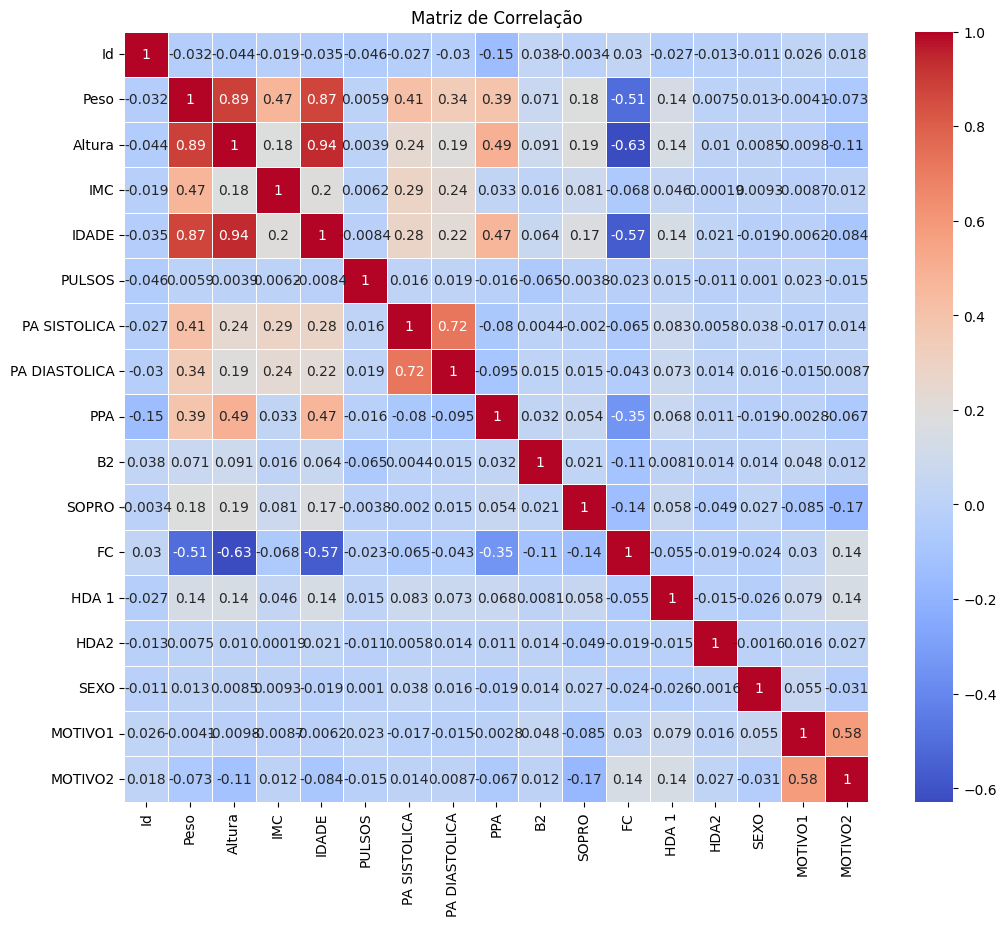

In [629]:
plt.figure(figsize=(12, 10))
# Cria um mapa de calor para a matriz de correlação, definindo o esquema de cores
sns.heatmap(correlacao, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

De acordo com o gráfico, peso e altura tem maior relação com idade, assim eles serão usados no treinamento do modelo.

ideia para tentar depois

Separando os dados

In [630]:
idades_treinamento = (dados_treino["IDADE"] >= 0.5) & (dados_treino["IDADE"] <= 19)

dados_filtrados = dados_treino[idades_treinamento]

display(dados_filtrados)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
1,4246,42.4,150,18.844444,12.43,2,100.519531,61.965495,2,2,2,84.0,0,3,1,2,2
2,9089,18.1,104,16.734467,3.82,2,130.000000,90.000000,3,2,2,100.0,1,6,1,2,12
6,2338,50.7,151,22.235867,9.72,2,110.000000,60.000000,4,2,1,80.0,0,2,1,2,2
8,1643,21.0,90,25.925926,2.57,2,100.519531,61.965495,2,2,2,110.0,7,2,1,1,13
10,11597,18.9,110,15.619835,6.11,2,100.519531,61.965495,2,2,1,80.0,0,5,0,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,398,12.8,89,16.159576,2.76,2,100.519531,61.965495,2,2,1,90.0,0,6,0,3,13
3138,12752,41.0,133,23.178246,8.83,2,110.000000,70.000000,4,2,2,94.0,0,6,1,2,3
3139,1818,24.0,126,15.117158,8.49,2,100.000000,60.000000,4,2,2,82.0,7,4,0,2,13
3143,14643,46.0,151,20.174554,13.83,2,120.000000,60.000000,4,2,1,96.0,3,6,0,3,10


Por hora, apenas iremos substituir as idades inválidas pela mediana.

In [631]:
idades_treinamento = (dados_treino["IDADE"] < 0.5) | (dados_treino["IDADE"] > 19)

dados_filtrados = dados_treino[idades_treinamento]

display(dados_filtrados)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,8957,4.5,54,15.432099,0.15,2,100.519531,61.965495,2,2,2,110.000000,3,5,0,1,13
7,13378,7.9,69,16.593153,0.49,2,100.519531,61.965495,2,2,1,88.000000,0,3,1,3,13
14,1976,3.2,51,12.302960,0.07,2,100.519531,61.965495,2,2,1,102.000000,7,6,0,3,12
15,15431,5.3,65,12.544379,0.49,2,100.519531,61.965495,2,3,2,80.000000,3,6,1,3,9
18,15707,7.0,59,20.109164,0.33,2,100.519531,61.965495,2,2,1,92.000000,0,6,1,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,4567,4.2,50,16.800000,0.33,2,100.519531,61.965495,2,2,2,100.000000,0,6,0,2,3
3122,6069,5.9,55,19.504132,0.22,2,100.519531,61.965495,2,2,1,92.293641,0,5,1,3,12
3127,15035,3.8,47,17.202354,0.00,2,100.519531,61.965495,2,2,1,124.000000,0,6,0,3,13
3131,898,3.6,52,13.313609,0.00,2,100.519531,61.965495,2,1,1,120.000000,0,4,0,3,13


Substituindo por NaN para depois trocar pela mediana

In [558]:
dados_treino.loc[idades_treinamento, "IDADE"] = np.nan

In [559]:
dados_treino['IDADE'] = dados_treino["IDADE"].fillna(dados_treino["IDADE"].median())

Plotando o boxplot

In [634]:
dados_treino['FC']= dados_treino['FC'].fillna(dados_treino['FC'].mean())

print(dados_treino['FC'].isna().sum())

0


In [635]:
display(dados_treino)
dados_treino.to_csv('dados_teste_tratados.csv', index=False)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,8957,4.5,54,15.432099,6.665,2,100.519531,61.965495,2,2,2,110.0,3,5,0,1,13
1,4246,42.4,150,18.844444,12.430,2,100.519531,61.965495,2,2,2,84.0,0,3,1,2,2
2,9089,18.1,104,16.734467,3.820,2,130.000000,90.000000,3,2,2,100.0,1,6,1,2,12
6,2338,50.7,151,22.235867,9.720,2,110.000000,60.000000,4,2,1,80.0,0,2,1,2,2
7,13378,7.9,69,16.593153,6.665,2,100.519531,61.965495,2,2,1,88.0,0,3,1,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,12752,41.0,133,23.178246,8.830,2,110.000000,70.000000,4,2,2,94.0,0,6,1,2,3
3139,1818,24.0,126,15.117158,8.490,2,100.000000,60.000000,4,2,2,82.0,7,4,0,2,13
3143,14643,46.0,151,20.174554,13.830,2,120.000000,60.000000,4,2,1,96.0,3,6,0,3,10
3144,15107,21.0,50,84.000000,6.665,2,100.519531,61.965495,2,2,1,133.0,0,3,0,3,13


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.

In [636]:
atributos = ['Peso', 'Altura', 'IMC', 'IDADE', 'PULSOS', 'PA SISTOLICA', 'PA DIASTOLICA', 'PPA', 'B2', 'SOPRO', 'FC', 'HDA 1', 'HDA2', 'SEXO', 'MOTIVO1', 'MOTIVO2']
target = ['CLASSE']

X = dados_treino[atributos]
y = dados_treino[target]



KeyError: "None of [Index(['CLASSE'], dtype='object')] are in the [columns]"

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
modelo = LogisticRegression()

In [637]:
modelo.fit(X,y)

c:\Users\PICHAU\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [2442, 10752]

In [ ]:
y_pred = modelo.predict(dados_teste)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Atendimento
- Convenio
- DN
- Id
